In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [37]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [40]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [41]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [42]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).first()

('2017-08-23',)

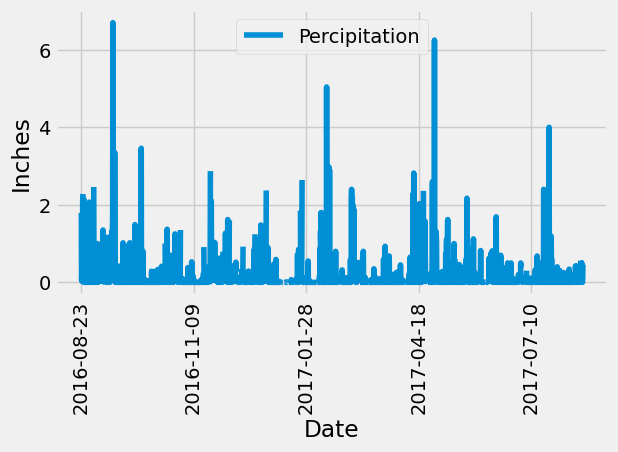

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
last_year_prcp = session.query(*sel).filter(Measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_prcp_df = pd.DataFrame(last_year_prcp, columns=['Date','Percipitation'])
last_year_prcp_df.set_index('Date')

# Sort the dataframe by date
last_year_prcp_df.sort_values('Date',inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
last_year_prcp_df.plot(x='Date',y='Percipitation',rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.grid(True)
plt.tight_layout()


In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_prcp_df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [46]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station, func.count(Measurement.station)]
session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
session.query(*sel).filter(Measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

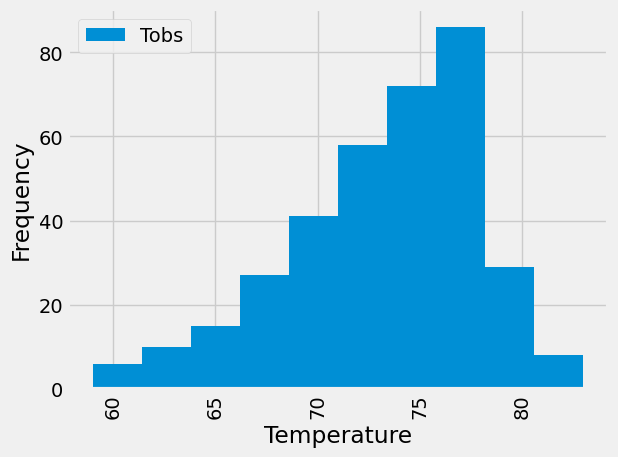

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve temperature observation data
last_year_tobs = session.query(Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame
last_year_tobs_df = pd.DataFrame(last_year_tobs, columns=['Tobs'])
last_year_tobs_df
# Use Pandas Plotting with Matplotlib to plot the data
last_year_tobs_df.plot(kind='hist',rot=90)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# Close session

In [49]:
# Close Session
session.close()